# Fun With Word2Vec: News Headlines

In [221]:
import pandas as pd
import gensim
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [222]:
main_data = pd.read_csv('News_Final.csv')

In [223]:
main_data.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


# Preprocessing

We'll start by doing some cleaning and manipulation on the text data. In particular, we need to:
1. Get individual words from article titles
2. Use NLTK to filter out stopwords, punctuation, and any words that are not known to Word2Vec
3. Turn the words into vector representations using Word2Vec

In [224]:
# Grab all the article titles
article_titles = main_data['Title']
article_titles.shape

(93239,)

In [225]:
# Create a list of strings, where each string is an article title
titles_list = [title for title in article_titles]

# Collapse the list of strings into a single long string for processing
big_title_string = ' '.join(titles_list)

from nltk.tokenize import word_tokenize

# Tokenize the string into words
tokens = word_tokenize(big_title_string)

# Remove non-alphabetic tokens, such as punctuation
words = [word.lower() for word in tokens if word.isalpha()]

# Filter out stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

words = [word for word in words if not word in stop_words]

# Print first 10 words
words[:10]

['obama',
 'lays',
 'wreath',
 'arlington',
 'national',
 'cemetery',
 'look',
 'health',
 'chinese',
 'economy']

In [226]:
# Load Word2Vec model (trained on an enormous Google corpus)
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary = True) 

# Check dimension of word vectors
model.vector_size

300

# Exploring Word2Vec

In [227]:
# 10 words/terms that are closer to 'Google' than to 'Apple'
model.words_closer_than('Google', 'Apple')[:10]

['Microsoft',
 'Yahoo',
 'AOL',
 'search_engine',
 'Yahoo!',
 'search_engines',
 'MSN',
 'Gmail',
 'Baidu',
 'Google_Maps']

In [228]:
# 10 words closer to 'ocean' than to 'water'
model.words_closer_than('ocean', 'water')[:10]

['sea',
 'coast',
 'river',
 'beach',
 'waters',
 'lake',
 'coastal',
 'marine',
 'Ocean',
 'underwater']

Note that `words_closer_than` is most interesting when the words are similar or related. If the words are *too* far apart, then you get a lot of everyday words back that just so happen to be somewhat closer to `w1` than to `w2`. For example:

In [229]:
model.words_closer_than('Google', 'cheese')[:10]

['that', 'on', 'the', 'not', 'it', 'have', 'he', 'this', 'their', 'they']

In [230]:
# Words that are most similar to 'obama'
model.most_similar(positive = 'obama')

[('mccain', 0.7319011688232422),
 ('hillary', 0.7284600138664246),
 ('obamas', 0.7229631543159485),
 ('george_bush', 0.720567524433136),
 ('barack_obama', 0.7045838832855225),
 ('palin', 0.7043113708496094),
 ('clinton', 0.6934448480606079),
 ('clintons', 0.6816835403442383),
 ('sarah_palin', 0.6815145015716553),
 ('john_mccain', 0.6800708174705505)]

In [231]:
# Most similar to 'microsoft'
model.most_similar(positive = 'microsoft')

[('adobe_photoshop', 0.8042365312576294),
 ('microsoft_office', 0.7978680729866028),
 ('windows_xp', 0.7926486134529114),
 ('buy_microsoft', 0.7902630567550659),
 ('cs4', 0.7494896650314331),
 ('autocad', 0.7432770729064941),
 ('photoshop', 0.7404437065124512),
 ('windows_vista', 0.7382056713104248),
 ('quickbooks', 0.7320875525474548),
 ('adobe_photoshop_cs4', 0.7269179821014404)]

In [232]:
# Which of these things doesn't belong?
model.doesnt_match(['trade', 'economy', 'deal', 'cheese'])

'cheese'

In [233]:
model.doesnt_match(['mountain', 'space', 'hill', 'rock'])

'space'

In [234]:
model.doesnt_match(['apple', 'orange', 'pork', 'pear'])

'pork'

In [235]:
# Let's see if it can do companies...
model.doesnt_match(['bain', 'google', 'microsoft', 'yahoo'])

'bain'

Impressive!

So what does a word vector actually look like? Let's find out:

In [236]:
economy_vec = model['economy']
economy_vec[:20] # First 20 components

array([ 0.18847656, -0.0703125 , -0.16113281,  0.03857422, -0.04956055,
       -0.23046875, -0.15722656, -0.16992188,  0.17089844, -0.01208496,
       -0.16015625, -0.02770996,  0.05932617,  0.00491333, -0.13769531,
        0.39257812,  0.06201172,  0.30859375,  0.12890625, -0.07373047],
      dtype=float32)

Okay, back to our last bit of preprocessing.

In [237]:
# Filter the list of vectors to include only those that Word2Vec has a vector for
vector_list = [model[word] for word in words if word in model.vocab]

# Create a list of the words corresponding to these vectors
words_filtered = [word for word in words if word in model.vocab]

# Zip the words together with their vector representations
word_vec_zip = zip(words_filtered, vector_list)

# Cast to a dict so we can turn it into a dataframe
word_vec_dict = dict(word_vec_zip)
df = pd.DataFrame.from_dict(word_vec_dict, orient='index')
df.shape

(21805, 300)

Now we have a bunch of tidy vectors in a DataFrame. Each column is the word's component for that dimension (300 dimensions total).

In [238]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
obama,-0.123535,0.072266,0.171875,0.402344,-0.125977,-0.302734,-0.044922,-0.015259,0.171875,-0.043457,...,-0.055420,-0.138672,-0.064453,-0.104004,-0.267578,-0.205078,-0.111816,-0.022461,0.066895,0.026855
lays,-0.052246,-0.057373,0.193359,-0.106934,0.298828,-0.166016,0.137695,0.125000,-0.032227,-0.096191,...,-0.172852,-0.484375,-0.228516,0.168945,-0.291016,0.003647,0.041016,0.229492,0.248047,0.353516
wreath,0.166992,0.199219,-0.082031,0.142578,0.055420,-0.102539,0.103516,-0.138672,0.030884,-0.007050,...,0.015503,-0.085938,-0.173828,0.109863,0.096680,-0.102051,0.119629,-0.287109,-0.085938,0.188477
arlington,-0.006653,0.023926,0.141602,0.160156,0.052490,0.113281,-0.125000,-0.138672,-0.136719,0.023071,...,0.130859,0.104004,0.064453,0.068848,-0.069336,-0.137695,-0.000572,-0.125977,-0.086914,0.112793
national,-0.135742,0.175781,0.117188,0.078613,0.052490,-0.238281,0.092773,-0.083984,0.061523,-0.062500,...,0.034180,-0.039551,0.034424,-0.075195,0.006775,-0.110840,0.069336,-0.068359,0.032471,-0.009338


# Dimensionality Reduction: t-SNE

Next, we're going to squish (read: do dimensionality reduction on) these word vectors using t-SNE. If you're not familiar with t-SNE and its interpretations, check out [this excellent, interactive distill.pub article](https://distill.pub/2016/misread-tsne/) on t-SNE. 

It's important to play around with the parameters for t-SNE, as different values can produce very different results. I tested several values between 0 and 100 for perplexity, and found that it produced roughly the same shape each time. I tested several learning rates between 20 and 400 as well, and decided to leave the learning rate at its default (200).

In [239]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(df[:400])

Now we're ready to plot our reduced array of word vectors and see what patterns we can find.

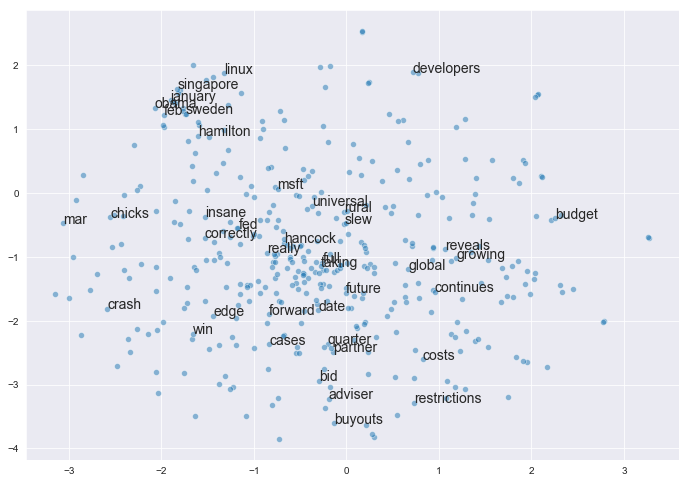

In [240]:
# Set seaborn's style to darkgrid - easier to see the text
sns.set_style('darkgrid')

# Creates a list of the indices of every 10th word
words_to_plot = list(np.arange(0, 400, 10))

# Initialize figure, set figure size
fig, ax = plt.subplots(figsize = (11.7, 8.27))

# Create scatterplot of all 400 words
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], ax = ax, alpha = 0.5)

# First plot: Overlay words, no adjustment
for word in words_to_plot:
    ax.text(tsne_df[word, 0], tsne_df[word, 1], df.index[word], fontsize = 14)

plt.show()

It would look a bit better if we could repel the text annotations from each other. Let's try this plot again with the `adjustText` package.

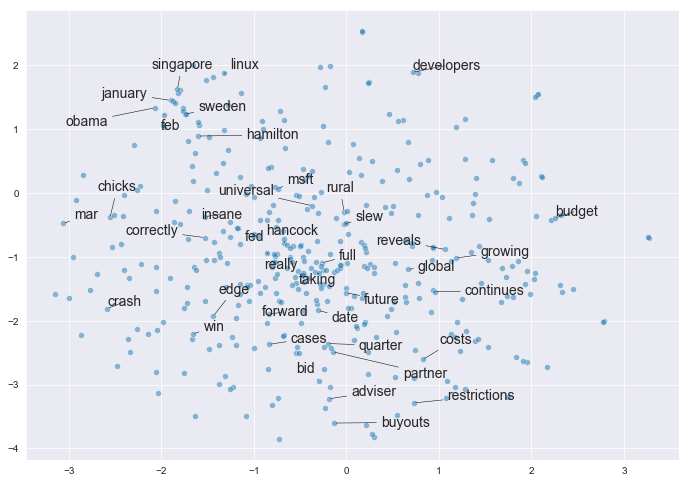

In [241]:
fig, ax = plt.subplots(figsize = (11.7, 8.27))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

# Second plot: Import adjustText, initialize list of texts
from adjustText import adjust_text
texts = []

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], df.index[word], fontsize = 14))
    
# Plot text using adjust_text (because overlapping text is hard to read)
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()

Note that even though the text still overlaps some points, we no longer have overlapping text. Nifty! 

If you're interested in trying out `adjust_text` for your own plotting needs, you can find it [here](https://github.com/Phlya/adjustText). Be sure to import using the camelcase `adjustText`.

For comparison, here's the same figure without the text adjusted:

It's encouraging to see that even when the vector embeddings have been reduced to 2 dimensions, we see certain items clustering together. For example, we have **months** in the left/upper left, we have **corporate finance terms** near the bottom, and we have more **generic, non-topical words** (like 'full', 'really', 'slew') in the middle.

Note that if we were to run the t-SNE again with different parameters, we may observe some similarities to this result, but we're not guaranteed to see the exact same patterns. t-SNE, as compared to PCA, is not deterministic. Relatedly, tightness of clusters and distances between clusters are not always meaningful. It is meant primarily as an exploratory tool, rather than as a decisive indicator of similarity. 

In [ ]:
# To be continued!